In [1]:
import statsmodels.api as sm
import pandas as pd

In [2]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


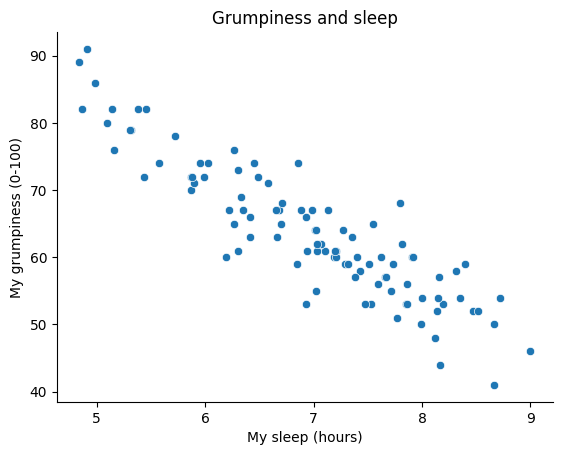

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure()

ax = sns.scatterplot(data = df,
                x = 'dan_sleep', 
                y = 'dan_grump')
ax.set(title = 'Grumpiness and sleep', ylabel = 'My grumpiness (0-100)', xlabel='My sleep (hours)')
sns.despine()

plt.show()

In [4]:
df.shape

(100, 4)

In [5]:
df['constant'] = 1
reg = sm.OLS(df['dan_grump'], df[['dan_sleep', 'baby_sleep']+['constant']])
model = reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dan_grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.2
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           2.15e-36
Time:                        13:59:58   Log-Likelihood:                -287.48
No. Observations:                 100   AIC:                             581.0
Df Residuals:                      97   BIC:                             588.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dan_sleep     -8.9502      0.553    -16.172      0.000     -10.049      -7.852
baby_sleep     0.0105      0.271      0.039      0.969      -0.527       0.549
constant     125.9656      3.041     41.423      0.000     119.930     132.001
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.218
Skew:                          -0.053   Prob(JB):                        0.897
Kurtosis:                       3.203   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.stattools import jarque_bera
